In [14]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from pathlib import Path



In [15]:
#Import csv file to be analyzed airline_passenger_satisfaction
# Goals: which percentage of airline passengers are satisfied? Does it vary

airline_pass_data = Path("Resources/airline_passenger_satisfaction.csv")

airline_data = pd.read_csv(airline_pass_data)
airline_data.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [ ]:
#Replace all 0's in columns with null values so they are not counted


In [16]:
# Total passengers in database

total_passengers = airline_data['ID'].count()
total_passengers

129880

In [17]:
# total number of passengers with satisfied reviews
satisfied_pass = airline_data[(airline_data['Satisfaction'] == 'Satisfied') & (airline_data['Satisfaction'] != 0)]
total_passengers = len(airline_data)
satisfied_count = len(satisfied_pass)
satisfied_percentage = (satisfied_count / total_passengers) * 100

satisfied_percentage


43.44625808438558

In [18]:
### get the number of 'Neutral or Dissatisfied' reviews
disatisfied_pass = airline_data[airline_data['Satisfaction'] == 'Neutral or Dissatisfied']
disatisfied_count = len(disatisfied_pass)
disatisfied_percentage = (disatisfied_count / total_passengers) * 100

disatisfied_percentage

56.55374191561441

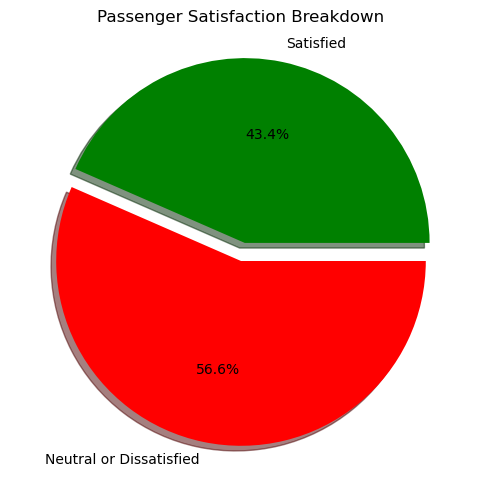

In [ ]:
# Pie chart for satisfaction reviews of the overall dataset
labels = ['Satisfied', 'Neutral or Dissatisfied']
sizes = [satisfied_percentage, disatisfied_percentage]
colors = ['green', 'red'] 
explode = (0.1, 0)

plt.figure(figsize=(8,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle= 0, colors=colors, explode=explode, shadow=True)
plt.title('Passenger Satisfaction Breakdown')
plt.show()

In [8]:
#Percentage of repeating customers
repeating_pass = airline_data[airline_data['Customer Type'] == 'Returning']
repeating_count = len(repeating_pass)
repeating_percentage = (repeating_count / total_passengers) * 100
repeating_percentage

81.69079149984601

In [12]:
# Percentage of First time customers
first_timers = airline_data[airline_data['Customer Type'] == 'First-time']
first_timers_count = len(first_timers)
first_timers_percentage = (first_timers_count / total_passengers) * 100
first_timers_percentage

18.30920850015399

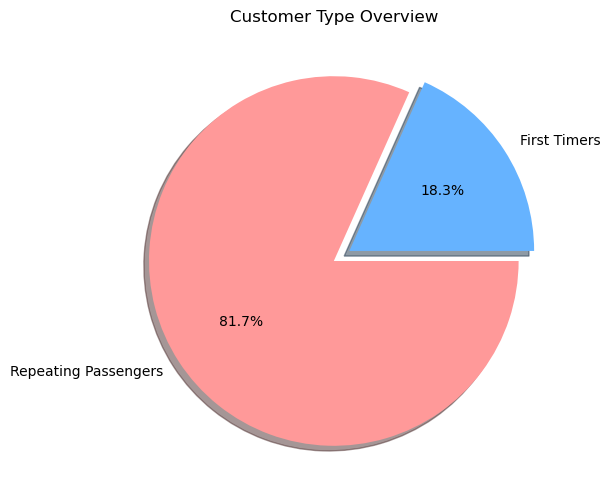

In [ ]:
# Pie chart for Customer Type of the overall dataset
labels = ['First Timers', 'Repeating Passengers']
sizes = [first_timers_percentage, repeating_percentage]
colors = ['#66b3ff', '#ff9999'] 
explode = (0.1, 0)

plt.figure(figsize=(8,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle= 0, colors=colors, explode=explode, shadow=True)
plt.title('Customer Type Overview')
plt.show()

In [19]:
# What percentage of the passengers are in Business, Economy, or Economy Plus classes
business_class = airline_data[airline_data['Class'] == 'Business']
business_count = len(business_class)
business_percentage = (business_count / total_passengers) * 100 
business_percentage

47.85956267323683

In [27]:
# Economy class
economy_class = airline_data[airline_data['Class'] == 'Economy'] 
economy_count = len(economy_class)
economy_percentage = (economy_count / total_passengers) * 100
economy_percentage

44.894518016630734

In [28]:
#Economy plus class
economy_plus = airline_data[airline_data['Class'] == 'Economy Plus']
economy_plus_count = len(economy_plus)
economy_plus_percentage = (economy_plus_count / total_passengers) * 100
economy_plus_percentage

7.24591931013243

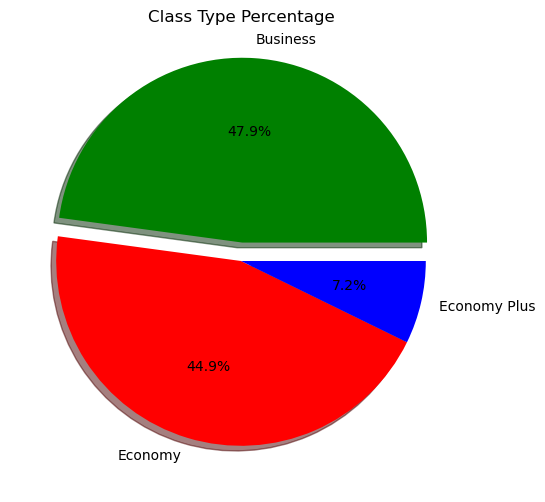

In [ ]:
# Pie chart for Class of Seats of the overall dataset
labels = ['Business', 'Economy', 'Economy Plus']
sizes = [business_percentage, economy_percentage, economy_plus_percentage]
colors = ['green', 'red', 'blue'] 
explode = (0.1, 0, 0)

plt.figure(figsize=(8,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle= 0, colors=colors, explode=explode, shadow=True)
plt.title('Class Type Percentage')
plt.show()

In [ ]:
# What is the distribution in flight data
#max flight data
flight_distance_max = airline_data['Flight Distance'].max()
flight_distance_min

4983

In [35]:
#min Flight data
flight_distance_min = airline_data['Flight Distance'].min()
flight_distance_min

31

In [ ]:
# Creating bins for increments of 500 in the Flight data
bins = range(0, 5000, 500)

flight_distance_bins = pd.cut(airline_data['Flight Distance'], bins=bins)
flight_distance_counts = flight_distance_bins.value_counts().sort_index()

labels = [f"{interval.le}]-{interval.right} miles" for interval in flight_distance_counts.index]
sizes = flight_distance_counts.values
colors = plt.cm.viridis_r(range(len(labels))) # Use a colormap for varied colors

# Plot the pie chart
plt.figure(figsize=(10,8))
plt.pie

In [ ]:
# What is most commonly disliked services?
``

In [ ]:
# What are the top 5 most liked services?

# What are the least like services?

In [ ]:
# Based on class is there a change in satisfaction?

In [ ]:
# Do delays cause an increase in dissatisfaction?
